In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import glob
import re
from scipy.optimize import curve_fit
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../')))
from md_styler import MDStyler
sty = MDStyler().apply()


In [2]:
def load_file(filenm):
    """
    Load xvg - file and return a pandas dataframe. 
    """
    data = []
    with open(filenm) as f:
        for line in f:
            #If line starts with @ or #, skip
            if line.startswith(('#', '@')):
                continue
            data.append([float(x) for x in re.split(r'\s+', line.strip())])
    return pd.DataFrame(data, columns=['time', 'value'])

In [12]:
def plot_variable_vs_reference(df, ref, name=None, used_var=None, bins=50):
    """
    Plots AA (reference) distribution as a normalized histogram and
    CG (variable) as a dashed KDE curve, using MDStyler's consistent formatting.
    Optionally draws a red dashed line for the variable value used in the simulation.
    """

    # colors and styles
    c_aa = sty.get_color("cyan")    # AA: filled hist
    c_cg = sty.get_color("box")     # CG: dashed KDE
    kw_cg = sty.as_cg()

    # --- fixed-size figure (square)
    fig, ax = sty.fig_horizontal()

    # --- plot AA histogram (filled)
    sns.histplot(ref.value, stat="density", bins=bins,
                    color=c_aa, alpha=0.35, edgecolor="none", label="AA", ax=ax)
    sns.kdeplot(df.value, color=c_cg, linestyle=kw_cg["linestyle"],
                linewidth=2.0, label="CG", bw_method="scott", ax=ax)

    # --- optional vertical line for used value
    if used_var is not None:
        ymin, ymax = ax.get_ylim()
        ax.vlines(used_var, ymin, ymax, color=sty.get_color("red"),
                  linestyle="--", linewidth=1.8, label="Used value")

    # --- labels and layout
    ax.set_xlabel("SASA (nm$^2$)")
    ax.set_ylabel("Probability density")
    if name:
        ax.set_title(name)

    ax.legend(frameon=False)
    plt.tight_layout()
    plt.show()


/tmp/ipykernel_95512/943879455.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


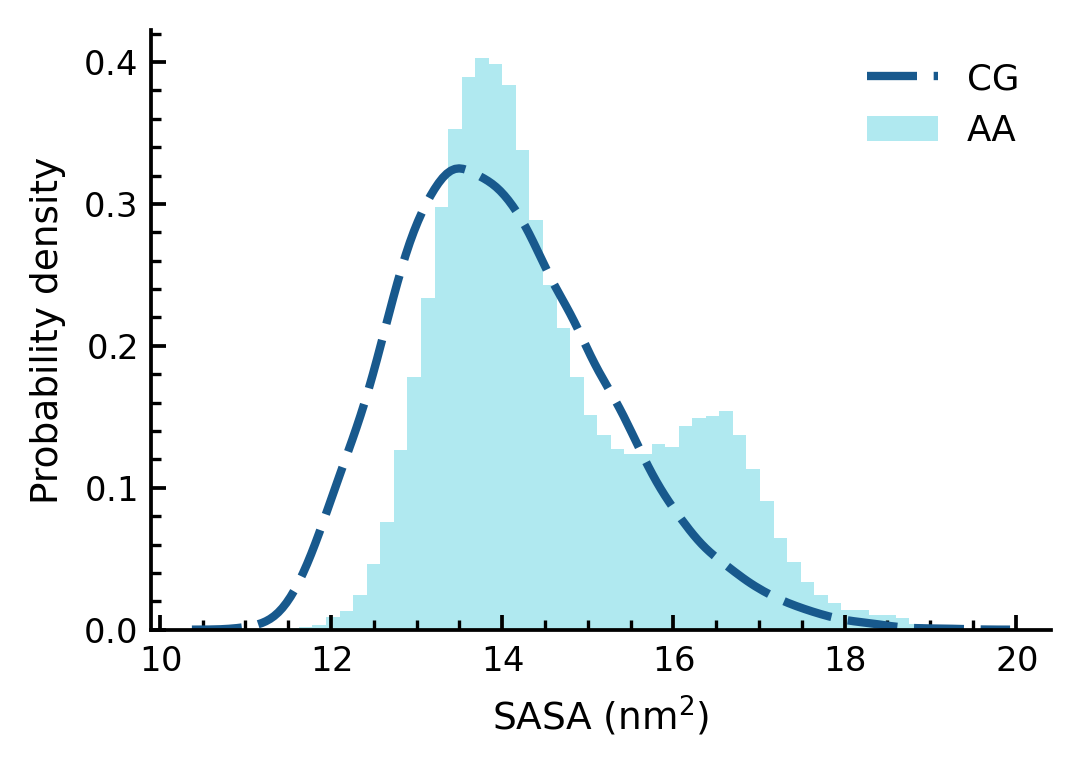

Mean SASA AA: 14.62
Mean SASA CG: 14.03
Percentage difference: -4.02%


In [13]:
df = load_file(f"CG/SASA-CG.xvg")
varnr = "SASA"
ref = load_file(f"AA/SASA-AA.xvg")

plot_variable_vs_reference(df, ref, name=None)
print(f"Mean SASA AA: {ref.value.mean():.2f}")
print(f"Mean SASA CG: {df.value.mean():.2f}")
print(f"Percentage difference: {(df.value.mean() - ref.value.mean())/ref.value.mean()*100:.2f}%")